# Marvellous Comics: mirror of society?
Superheroes and villains in comics can have a real impact on society. They’re supposed to represent what’s good and bad. Thus, the way the character is portrayed will have an influence on the reader. If for example all villains are part of the same minority, people will unconsciously see them in real life as bad people. Moreover, a character like Tony Stark could inspire people to study engineering. And these are just examples to illustrate the power comics can have on us.
We can thus study this choice of characters, how diverse it is, and if there is a tendency towards a specific portrait for superheroes and villains. 

## Data Acquisition
Here, the aim is to load the datasets, merge and combine them. Build the datawarehouse, that is easy to work on.

### Parsing the web, and loading dataset from web

In [1]:
# Import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import math

### Make the database ready-to-use

In [2]:
personnage = pd.read_pickle("personnage_url.txt")
personnage.head(5)

,URL,Real Name,Identity,Current Alias,Citizenship,Marital Status,Occupation,Education,Gender,Height,Weight,Eyes,Hair,Place of Birth
0,/wiki/Aaron_the_Aakon_(Earth-616),Aaron,Secret Identity,,Aakon,Single,Slave trader,,Male,,,Brown,Black,Planet Oorga
1,/wiki/2-D_(Earth-616),Darell (full name unrevealed)[1],Secret Identity,2-D,American,Single,Adventurer,,Male,,,Brown,Brown,
2,/wiki/Abraham_Erskine_(Earth-616),Abraham Erskine[1],Known to Authorities Identity,Dr. Joseph Reinstein,"German, American",Married,Scientist,Advanced College Degree,Male,"5' 6"" (1.68 m)",160 lbs (73 kg),Brown,Black (graying),Germany
3,/wiki/11-Ball_(Earth-616),nknown,Secret Identity,11-Ball,American,Single,Professional criminal; former henchman,,Male,,,,,
4,/wiki/Abraham_(Earth-616),Abraham,No Dual Identity,,,Married,Prophet,,Male,,,,Black,


## Data acquaintance

In [3]:
#Check if we have any missing values
personnage.isnull().values.any()

False

***Now, we will have a look at every column and study how there are filled in order to better comprehend the data and clean it***

In [4]:
#We start with the Real Name of the characters
personnage['Real Name'].value_counts()

nknown                                                       3666
Unknown                                                       462
Unrevealed                                                    108
Not Applicable                                                 27
Unknown (The symbiote takes the name of its current host)      24
                                                             ... 
Laroximous Boneflayer                                           1
Dandre                                                          1
Julius Akerman                                                  1
Paul Dunne[1]                                                   1
Jesse Pinto                                                     1
Name: Real Name, Length: 22947, dtype: int64

***Regarding the real Name, we can observe that we have a few categories of unknown names, we are going to group them together under the label 'Unknown'***

In [5]:
personnage.loc[personnage['Real Name']=='nknown', 'Real Name'] ='Unknown'
personnage.loc[personnage['Real Name']=='Unrevealed', 'Real Name'] ='Unknown'
personnage.loc[personnage['Real Name']=='', 'Real Name'] ='Unknown'
personnage.loc[personnage['Real Name']=='N/A', 'Real Name'] ='Unknown'
personnage.loc[personnage['Real Name']=='Unknown (The symbiote takes the name of its current host)', 'Real Name'] ='Unknown'
personnage.loc[personnage['Real Name']=='None', 'Real Name'] ='Unknown'
personnage["Real Name"] = personnage["Real Name"].str.replace(r'\s\[\d\]', '')
personnage["Real Name"] = personnage["Real Name"].str.replace(r'\[\d\]', '')
personnage['Real Name'].value_counts()

Unknown                          4297
Not Applicable                     27
Martin (full name unrevealed)      11
James "Jamie" Arthur Madrox        10
Miles Warren                        6
                                 ... 
Frank Rambeau                       1
Charlie Jenson                      1
Consuela Sanchez                    1
Black (first name unrevealed)       1
B'Gon                               1
Name: Real Name, Length: 22866, dtype: int64

***We now look at the identity of the characters***

In [6]:
personnage["Identity"].value_counts()

No Dual Identity                                                                                                                                                      14653
Secret Identity                                                                                                                                                        7311
Public Identity                                                                                                                                                        2953
                                                                                                                                                                       2882
Known to Authorities Identity                                                                                                                                           144
No Dual Identity [1]                                                                                                                        

***It looks like the identities are distribiuted among 'No Dual Identity', 'Secret Identity', 'Public Identity' and 'Known to Authorities Identity'***

In [7]:
personnage["Identity"] = personnage["Identity"].str.replace(r'\s\[\d\]', '')
personnage["Identity"] = personnage["Identity"].str.replace(r'\[\d\]', '')
personnage["Identity"] = personnage["Identity"].replace([''], 'Unknown')
personnage.loc[personnage['Identity'].str.contains('Dual'), 'Identity'] = 'No Dual Identity'
personnage.loc[personnage['Identity'].str.contains('Authorities'), 'Identity'] = 'Known to Authorities Identity'
personnage.loc[personnage['Identity'].str.contains('Public'), 'Identity'] = 'Public Identity'
personnage.loc[personnage['Identity'].str.contains('Secret'), 'Identity'] = 'Secret Identity'
personnage.loc[personnage['Identity'].str.contains('Dial'), 'Identity'] = 'No Dual Identity'
personnage.loc[personnage['Identity'].str.contains('Robot'), 'Identity'] = 'Public Identity'
personnage["Identity"].value_counts()

No Dual Identity                 14677
Secret Identity                   7331
Public Identity                   2965
Unknown                           2882
Known to Authorities Identity      154
Name: Identity, dtype: int64

***We continue with the Alias***

In [8]:
personnage["Current Alias"].value_counts()

                      15844
Nova                     28
Ghost Rider              16
Crimson Dynamo           16
Black Knight             15
                      ...  
Jim Lukus                 1
Bruiser Bates             1
Gregor                    1
King of Vipers            1
Dr. Eric Schwinner        1
Name: Current Alias, Length: 10047, dtype: int64

In [9]:
personnage.loc[personnage['Current Alias']=='', 'Current Alias'] ='Unknown'
personnage['Current Alias'] = personnage['Current Alias'].str.replace(r'\s\[\d\]', '')
personnage['Current Alias'] = personnage['Current Alias'].str.replace(r'\[\d\]', '')
personnage["Current Alias"].value_counts().head(50)

Unknown             15845
Nova                   28
Ghost Rider            18
Crimson Dynamo         16
Black Knight           16
Smasher                14
Captain America        14
Guardsman              14
Baron Zemo             13
Black Widow            11
Wendigo                11
Hobgoblin              11
Executioner            11
Cyclops                11
Vulture                10
Black Panther           9
Wolverine               9
Hulk                    9
Aries                   9
Sentry                  9
Beetle                  9
Beast                   8
Iron Man                8
Thor                    8
Scarlet Spider          8
Fang                    8
Spider-Man              8
Brain                   8
Red Skull               8
Scarlet Knight          7
Iron Fist               7
Destroyer               7
Riot                    7
Ms. Marvel              7
Tarantula               7
Spike                   7
Scourge                 7
Multiple Man            7
Firebrand   

***Citizenship***

In [10]:
personnage["Citizenship"].value_counts()

American                                                          10392
                                                                   8188
United States                                                       520
British                                                             499
German                                                              469
                                                                  ...  
Algerian                                                              1
American, Kenyan, Krakoan, [citation needed] formerly Wakandan        1
Italian, American, [1]                                                1
Strange Matter Dimension                                              1
Bagmoman                                                              1
Name: Citizenship, Length: 1546, dtype: int64

In [11]:
personnage.loc[personnage["Citizenship"]=="", 'Citizenship'] = 'Unknown'
personnage.loc[personnage["Citizenship"]=="USA", 'Citizenship'] = 'American'
personnage.loc[personnage["Citizenship"]=="United States of America", 'Citizenship'] = 'American'
personnage.loc[personnage["Citizenship"]=="United States", 'Citizenship'] = 'American'
personnage.loc[personnage["Citizenship"]=="America", 'Citizenship'] = 'American'
personnage.loc[personnage["Citizenship"]=="British, English", 'Citizenship'] = 'British'
personnage.loc[personnage["Citizenship"]=="United Kingdom", 'Citizenship'] = 'British'
personnage.loc[personnage["Citizenship"]=="English", 'Citizenship'] = 'British'
personnage.loc[personnage["Citizenship"]=="Scottish, British", 'Citizenship'] = 'British'
personnage.loc[personnage["Citizenship"]=="British, Scottish", 'Citizenship'] = 'British'
personnage.loc[personnage["Citizenship"]=="English, British", 'Citizenship'] = 'British'
personnage["Citizenship"] = personnage["Citizenship"].str.replace(r'\s\[\d\]', '')
personnage["Citizenship"] = personnage["Citizenship"].str.replace(r'\[\d\]', '')
personnage["Citizenship"].value_counts()

American                  11033
Unknown                    8190
British                     731
German                      469
Canadian                    327
                          ...  
Voldhom                       1
American, Sakaaran            1
Mongolia                      1
Sark                          1
Akkharia, Anakia, Shem        1
Name: Citizenship, Length: 1527, dtype: int64

***Marital Status***

In [12]:
personnage["Marital Status"].value_counts()

                                                                                            16788
Single                                                                                       7993
Married                                                                                      2190
Widowed                                                                                       608
Divorced                                                                                      255
Separated                                                                                      64
Engaged                                                                                        49
Married [1]                                                                                     4
Married [citation needed]                                                                       4
Single [1]                                                                                      3
Married (presumably)

In [13]:
personnage.loc[personnage["Marital Status"]=="", 'Marital Status'] = 'Unknown'
personnage["Marital Status"] = personnage["Marital Status"].str.replace(r'\s\[\d+\]', '')
personnage["Marital Status"] = personnage["Marital Status"].str.replace(r'\[\d+\]', '')
personnage["Marital Status"].value_counts()

Unknown                                                                                     16788
Single                                                                                       7997
Married                                                                                      2196
Widowed                                                                                       610
Divorced                                                                                      257
Separated                                                                                      67
Engaged                                                                                        49
Married [citation needed]                                                                       4
Single (presumed)                                                                               4
Divorced ; Widowed                                                                              2
Married (presumably)

***Occupation***

In [14]:
personnage["Occupation"].value_counts()

                                                8700
Student                                          645
Criminal                                         600
Scientist                                        428
Adventurer                                       321
                                                ... 
Director of the Office of National Emergency       1
Cold Bloody Killer, Criminal                       1
Munitions manufacturer                             1
Colonel in the Pakistan Army                       1
Ruler of the New York's sewers inhabitants         1
Name: Occupation, Length: 9029, dtype: int64

In [15]:
personnage.loc[personnage["Occupation"]=="", 'Occupation'] = 'Unknown'
personnage["Occupation"] = personnage["Occupation"].str.replace(r'\s\[\d+\]', '')
personnage["Occupation"] = personnage["Occupation"].str.replace(r'\[\d+\]', '')
personnage["Occupation"].value_counts()

Unknown                                                                   8701
Student                                                                    645
Criminal                                                                   601
Scientist                                                                  428
Adventurer                                                                 322
                                                                          ... 
Adventurer, fugitive, former government agent                                1
Spy, communist agent; former Nazi agent                                      1
God of the Underworld; ruler of the Kingdom of Tuonela                       1
Businessman, Arbritration Games C.E.O.                                       1
Freelance hacker, Robot Maker, mercenary, former professional criminal       1
Name: Occupation, Length: 8983, dtype: int64

***Education***

In [16]:
personnage["Education"].value_counts()

                                                       26162
Artificial Intelligence                                   54
Trained on an unnamed world to be a spy                   51
High School                                               39
High school graduate                                      35
                                                       ...  
MS in electrical engineering[4]                            1
Columbia University and Harvard Law School graduate        1
Self-educated in European arts and culture                 1
Trained and educated by Varnae                             1
Doctorate in nuclear physics from Caltech                  1
Name: Education, Length: 1140, dtype: int64

In [17]:
personnage.loc[personnage["Education"]=="", 'Education'] = 'Unknown'
personnage.loc[personnage["Education"]=="Unrevealed", 'Education'] = 'Unknown'
personnage["Education"] = personnage["Education"].str.replace(r'\s\[\d+\]', '')
personnage["Education"] = personnage["Education"].str.replace(r'\[\d+\]', '')
personnage.loc[personnage["Education"]=="High school graduate", 'Education'] = 'High School'
personnage.loc[personnage["Education"]=="High School Graduate", 'Education'] = 'High School'
personnage.loc[personnage["Education"]=="High School graduate", 'Education'] = 'High School'
personnage.loc[personnage["Education"]=="High School student", 'Education'] = 'High School'
personnage.loc[personnage["Education"]=="High School Student", 'Education'] = 'High School'
personnage.loc[personnage["Education"]=="High school student", 'Education'] = 'High School'
personnage.loc[personnage["Education"]=="High-school dropout", 'Education'] = 'High School Dropout'
personnage.loc[personnage["Education"]=="High school dropout", 'Education'] = 'High School Dropout'
personnage.loc[personnage["Education"]=="High school drop-out", 'Education'] = 'High School Dropout'
personnage.loc[personnage["Education"]=="High school", 'Education'] = 'High School'
personnage.loc[personnage["Education"]=="Some high school", 'Education'] = 'High School'
personnage.loc[personnage["Education"]=="Some college", 'Education'] = 'College'
personnage.loc[personnage["Education"]=="College Graduate", 'Education'] = 'College'
personnage.loc[personnage["Education"]=="College graduate", 'Education'] = 'College'
personnage.loc[personnage["Education"]=="College educated", 'Education'] = 'College'
personnage.loc[personnage["Education"]=="College education", 'Education'] = 'College'
personnage.loc[personnage["Education"]=="College degree", 'Education'] = 'College'
personnage.loc[personnage["Education"]=="University graduate", 'Education'] = 'University'
personnage.loc[personnage["Education"]=="Ph.D.", 'Education'] = 'Doctorate'
personnage.loc[personnage["Education"]=="PhD", 'Education'] = 'Doctorate'
personnage["Education"].value_counts()

Unknown                                                           26177
High School                                                         164
College                                                              80
Artificial Intelligence                                              54
Trained on an unnamed world to be a spy                              51
                                                                  ...  
Unspecified doctoral degree                                           1
Masters degree in geophysics, some doctoral research completed        1
PhD in biochemistry                                                   1
Trained as a Valkyrie warrior                                         1
Advanced degrees in chemistry                                         1
Name: Education, Length: 1093, dtype: int64

In [33]:
personnage["Gender"] = personnage["Gender"].str.replace(r'\s\[\d+\]', '')
personnage["Gender"] = personnage["Gender"].str.replace(r'\[\d+\]', '')
personnage.loc[personnage["Gender"]=="", 'Gender'] = 'Unknown'
personnage.loc[personnage["Gender"]=="UNCLEAR", 'Gender'] = 'Unknown'
personnage.loc[personnage["Gender"]=="Male/Female", 'Gender'] = 'Unknown'
personnage.loc[personnage["Gender"]=="Female(as Shub-Niggurath),male(as Sahb Delanzar) (see notes)", 'Gender'] = 'Genderfluid'
personnage.loc[personnage['Gender'].str.contains('Genderfluid'), 'Gender'] = 'Genderfluid'
personnage.loc[personnage["Gender"]=="Male(Originally), Genderfluid (as shapeshifter)", 'Gender'] = 'Genderfluid'
personnage.loc[personnage["Gender"]=="Mobile", 'Gender'] = 'Genderfluid'
personnage.loc[personnage["Gender"]=="Female, (formerly Male)", 'Gender'] = 'Transgender'
personnage.loc[personnage["Gender"]=="Female(Female Clone of Male)", 'Gender'] = 'Female'
personnage.loc[personnage["Gender"]=="Male, merged with a mortal female", 'Gender'] = 'Male'
personnage.loc[personnage["Gender"]=="Male(probably)", 'Gender'] = 'Male'
personnage.loc[personnage['Gender'].str.contains('Agender'), 'Gender'] = 'Agender'
personnage["Gender"].value_counts()

Male               19794
Female              6743
Unknown             1268
Agender              177
Genderfluid           15
Gestalt                5
Transgender            3
female                 2
Earth-616              1
Male and Female        1
Name: Gender, dtype: int64

***Height***

In [20]:
personnage["Height"].value_counts()

                                            24555
Variable                                      278
6' 0" (1.83 m)                                268
5' 11" (1.80 m)                               228
5' 10" (1.78 m)                               224
                                            ...  
75' 0" (22.86 m)                                1
5' 9" (1.75 m) in costume 6'1"[1]               1
6' 2" (1.88 m) (human); 6' 6" (werewolf)        1
6' 0" (1.83 m) (by approximation)               1
2' 4" (71.12 cm)                                1
Name: Height, Length: 586, dtype: int64

In [21]:
personnage["Height"] = personnage["Height"].str.replace(r'\s\[\d+\]', '')
personnage["Height"] = personnage["Height"].str.replace(r'\[\d+\]', '')
personnage.loc[personnage["Height"]=="", "Height"] = 'Unknown'
personnage.loc[personnage["Height"]=="Unknown ", "Height"] = 'Unknown'
personnage.loc[personnage["Height"]=="Incalculable ", "Height"] = 'Unknown'
personnage.loc[personnage["Height"]=="Variable ", "Height"] = 'Variable'
personnage.loc[personnage["Height"]=="variable ", "Height"] = 'Variable'
personnage["Height"].value_counts().head()

Unknown            24564
Variable             289
6' 0" (1.83 m)       270
5' 11" (1.80 m)      231
5' 10" (1.78 m)      227
Name: Height, dtype: int64

***Weight***

In [22]:
personnage["Weight"].value_counts()

                                                    24704
Variable                                              272
180 lbs (82 kg)                                        95
175 lbs (79 kg)                                        88
190 lbs (86 kg)                                        84
                                                    ...  
750 lbs (340 kg) (Variable)                             1
430 lbs (195 kg) (Variable)                             1
645 lbs (293 kg) 146 lbs (66 kg) (humanoid form)        1
96 lbs (44 kg) (120 lbs in prime)                       1
72 lbs (33 kg)                                          1
Name: Weight, Length: 867, dtype: int64

In [23]:
personnage["Weight"] = personnage["Weight"].str.replace(r'\s\[\d+\]', '')
personnage["Weight"] = personnage["Weight"].str.replace(r'\[\d+\]', '')
personnage.loc[personnage["Weight"]=="", "Weight"] = 'Unknown'
personnage.loc[personnage["Weight"]=="Unknown ", "Weight"] = 'Unknown'
personnage.loc[personnage["Weight"]=="variable ", "Weight"] = 'Variable'
personnage.loc[personnage["Weight"]=="Variable ", "Weight"] = 'Variable'
personnage["Weight"].value_counts()

Unknown                                                      24713
Variable                                                       282
180 lbs (82 kg)                                                 96
175 lbs (79 kg)                                                 89
190 lbs (86 kg)                                                 85
                                                             ...  
430 lbs (195 kg) (Variable)                                      1
645 lbs (293 kg) 146 lbs (66 kg) (humanoid form)                 1
96 lbs (44 kg) (120 lbs in prime)                                1
115 lbs (52 kg) (Cassandra Nova),Inapplicable (true form)        1
365 lbs (166 kg)                                                 1
Name: Weight, Length: 848, dtype: int64

***Eye***

In [24]:
personnage["Eyes"] = personnage["Eyes"].str.replace(r'\s\[\d+\]', '')
personnage["Eyes"] = personnage["Eyes"].str.replace(r'\[\d+\]', '')
personnage.loc[personnage["Eyes"]=="", "Eyes"] = 'Unknown'
personnage['Eyes'].value_counts().head(10)

Unknown    15390
Brown       4060
Blue        3305
Black       1154
Green        920
Red          694
White        519
Yellow       385
Grey         157
Hazel        142
Name: Eyes, dtype: int64

***Hair***

In [25]:
personnage["Hair"] = personnage["Hair"].str.replace(r'\s\[\d+\]', '')
personnage["Hair"] = personnage["Hair"].str.replace(r'\[\d+\]', '')
personnage.loc[personnage["Hair"]=="", "Hair"] = 'Unknown'
personnage['Hair'].value_counts().head(10)

Black      6543
Unknown    5646
Brown      4717
Blond      2730
No Hair    1644
White      1233
Bald       1220
Grey       1008
Red         992
Green       157
Name: Hair, dtype: int64

In [26]:
personnage["Place of Birth"] = personnage["Place of Birth"].str.replace(r'\s\[\d+\]', '')
personnage["Place of Birth"] = personnage["Place of Birth"].str.replace(r'\[\d+\]', '')
personnage.loc[personnage["Place of Birth"]=="", "Place of Birth"] = 'Unknown'
personnage["Place of Birth"].value_counts().head(10)

Unknown                    23249
Germany                      185
Attilan                      138
New York City, New York       89
Atlantis                      88
Skrull Empire                 86
Japan                         84
United Kingdom                75
Asgard                        71
Wakanda                       51
Name: Place of Birth, dtype: int64

In [27]:
personnage.head(20)

,URL,Real Name,Identity,Current Alias,Citizenship,Marital Status,Occupation,Education,Gender,Height,Weight,Eyes,Hair,Place of Birth
0,/wiki/Aaron_the_Aakon_(Earth-616),Aaron,Secret Identity,Unknown,Aakon,Single,Slave trader,Unknown,Male,Unknown,Unknown,Brown,Black,Planet Oorga
1,/wiki/2-D_(Earth-616),Darell (full name unrevealed),Secret Identity,2-D,American,Single,Adventurer,Unknown,Male,Unknown,Unknown,Brown,Brown,Unknown
2,/wiki/Abraham_Erskine_(Earth-616),Abraham Erskine,Known to Authorities Identity,Dr. Joseph Reinstein,"German, American",Married,Scientist,Advanced College Degree,Male,"5' 6"" (1.68 m)",160 lbs (73 kg),Brown,Black (graying),Germany
3,/wiki/11-Ball_(Earth-616),Unknown,Secret Identity,11-Ball,American,Single,Professional criminal; former henchman,Unknown,Male,Unknown,Unknown,Unknown,Unknown,Unknown
4,/wiki/Abraham_(Earth-616),Abraham,No Dual Identity,Unknown,Unknown,Married,Prophet,Unknown,Male,Unknown,Unknown,Unknown,Black,Unknown
5,/wiki/Abarac_(Earth-616),Abarac,No Dual Identity,Unknown,Cybernian,Single,"Court magician, advisor",Unknown,Male,Unknown,Unknown,Unknown,White,Unknown
6,/wiki/Abdul_Faoul_(Earth-616),Professor Abdul Faoul,Secret Identity,Scarlet Scarab,Egyptian,Single,"Archeologist, adventurer",Unknown,Male,Unknown,Unknown,Unknown,Black,Egypt
7,/wiki/A.C._O%27Connor_(Earth-616),A. C. O'Connor,No Dual Identity,Ace O'Connor,American,Single,Journalist,Unknown,Female,Unknown,Unknown,Blue,Blond,Unknown
8,/wiki/7-X9_(Earth-616),Unknown,No Dual Identity,7-X9,Unknown,Unknown,Unknown,Unknown,Male,Unknown,Unknown,Unknown,Unknown,Unknown
9,/wiki/803_(Earth-616),803,No Dual Identity,Unknown,Unknown,Single,Unknown,Unknown,Agender,Unknown,Unknown,Unknown,Unknown,Unknown


In [43]:
Gender_df = pd.DataFrame(personnage['Gender'].value_counts())\
              .reset_index()
Gender_df.columns = ['Gender', 'count']
#Gender_df['count'] = Gender_df['count'].apply(lambda x: math.sqrt(x))\
#                                       .round(2)
Gender_df

,Gender,count
0,Male,19794
1,Female,6743
2,Unknown,1268
3,Agender,177
4,Genderfluid,15
5,Gestalt,5
6,Transgender,3
7,female,2
8,Earth-616,1
9,Male and Female,1


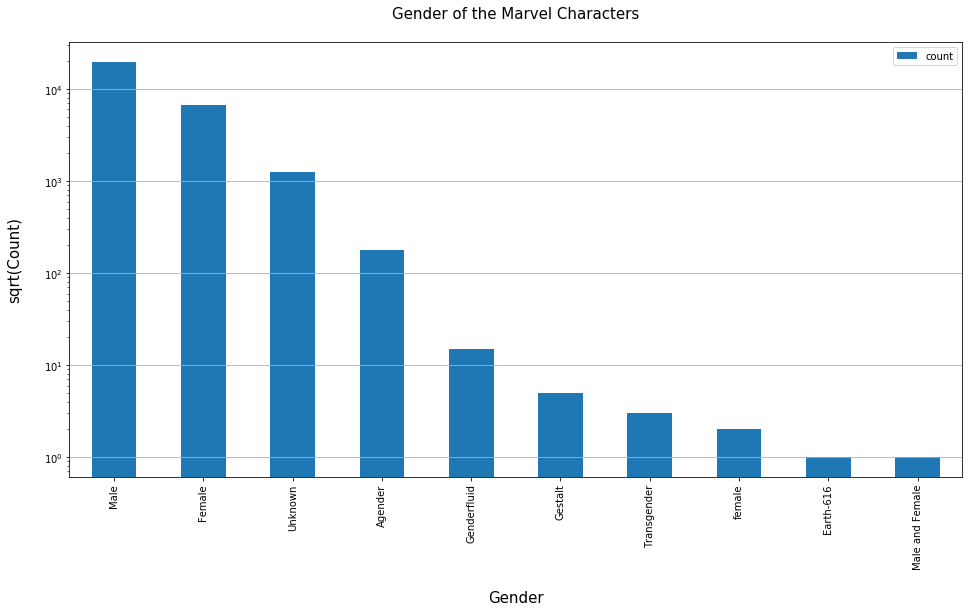

In [44]:
ax = Gender_df.plot.bar(x='Gender', y='count', rot=90, figsize=(16,8))
ax.set_xlabel('\nGender', fontsize=15)
ax.set_ylabel('sqrt(Count)\n', fontsize=15)
ax.set_title('Gender of the Marvel Characters\n', fontsize=15)
plt.grid(axis='y')
plt.yscale('log')

In [51]:
#We clean more the eye color:
#lowercase Eyes column and Gender column
personnage['Eyes']=personnage['Eyes'].str.lower()
personnage['Gender']=personnage['Gender'].str.lower()
personnage.loc[personnage['Eyes'].str.contains('variable')] = 'variable'
personnage.loc[personnage['Eyes'].str.contains('formerly')] = 'variable'
personnage.loc[personnage['Eyes'].str.contains(';')] = 'variable'

gender_VS_eye = personnage[['Eyes','Gender','Real Name']].groupby(['Eyes','Gender']).count()\
                                                         .rename(columns={'Real Name':'Count'})\
                                                         .sort_values(by='Eyes', ascending=False)\
                                                         .reset_index()
                                                         
# We drop the rows where the gender is unkwon
gender_VS_eye.head(50)

,Eyes,Gender,Count
0,"yellow, then red (as dryrot)",male,1
1,yellow without pupil or iris visible (black in...,male,1
2,yellow with no visible irises or pupils,unknown,1
3,yellow white,male,1
4,yellow green (specifically light yellow green),male,1
5,"yellow , originally white",female,1
6,"yellow , glowing orange when using powers",male,1
7,yellow (with black sclera),male,2
8,yellow (when under the control of calypso),male,1
9,yellow (that glow),male,1


In [ ]:
color_list = ['']

In [ ]:
personnage['Occupation'].value_counts().head(50)

In [ ]:
personnage[personnage['Real Name'].str.contains('Stark')]

***Loading and cleaning the DC dataset***

In [52]:
dc_pers = pd.read_pickle("perso_dc.txt")
dc_pers_df = pd.DataFrame(dc_pers[0])
dc_pers_df_1 = pd.DataFrame(dc_pers[1])
#Concatenate both dataframes
dc_pers_df = pd.concat([dc_pers_df, dc_pers_df_1], ignore_index=True)
dc_pers_df.head(20)

,URL,Real Name,Identity,Current Alias,Citizenship,Good or Bad,Marital Status,Occupation,Education,Gender,Height,Weight,Eyes,Hair,Place of Birth
0,https://dc.fandom.com//wiki/Adam_Blake_(The_Nail),Adam Blake,Secret Identity,Captain Comet,,Good,,,,Male,,,Hazel,Brown,
1,https://dc.fandom.com//wiki/Ada_LaBostrie_(New...,Ada LaBostrie,Public Identity,Ada LaBostrie,American,Good,Married,Housewife,,Female,,,Brown,Black,
2,https://dc.fandom.com//wiki/Adellca_(New_Earth),Adellca,Secret Identity,Green Lantern,,Good,Single,Green Lantern,,Female,,,Black,Black,
3,https://dc.fandom.com//wiki/A-1_(Prime_Earth),Artificial Intelligence Data Flow,,A-I,,Good,Single,,,,,,,,
4,https://dc.fandom.com//wiki/Ace_Egan_(Quality_...,Ace Egan,Secret Identity,Ace of Space,,Good,,,,Male,,,,,New York
5,https://dc.fandom.com//wiki/Abigail_Cable_(The...,Abigail Cable,,,,Good,,,,Female,,,Blue,White,
6,https://dc.fandom.com//wiki/Abraham_Arlington_...,Abraham Arlington,,Azrael,British,Good,,,,Male,,,,,
7,https://dc.fandom.com//wiki/Abisha_(Prime_Earth),Abisha (surname unknown),Public Identity,Abisha,,Good,Single,Bodyguard,,Male,,,Black,Bald,
8,https://dc.fandom.com//wiki/Alan_Scott_(DC_Uni...,Alan Scott,Secret Identity,Green Lantern,American,Good,,,,Male,,,,Blond,
9,https://dc.fandom.com//wiki/Adam_Strange_(Kryp...,Adam Strange,Public Identity,,American,Good,,,College (abandoned),Male,,,Blue,Light Brown,Earth


***Let us clean the data set, starting with the Real Name column***

In [ ]:
print('Missing Values : {}'.format(dc_pers_df['Real Name'].isnull().sum()))
dc_pers_df['Real Name'].value_counts()

In [ ]:
dc_pers_df["Real Name"] = dc_pers_df["Real Name"].str.replace(r'\s\[\d\]', '')
dc_pers_df["Real Name"] = dc_pers_df["Real Name"].str.replace(r'\[\d\]', '')
dc_pers_df.loc[dc_pers_df['Real Name']=='None', 'Real Name'] ='Unknown'
dc_pers_df.loc[dc_pers_df['Real Name']=='', 'Real Name'] ='Unknown'
dc_pers_df['Real Name'].value_counts()

***Identity***